## Exploring Stack Exchange  

Stack Exchange is a Q&A platform where users ask and answer topic-specific questions. 

### Key Insights  
- **Accepted Questions**: Site-specific, e.g., Data Science SE covers ML, statistics, and data preprocessing.  
- **Site Sections**: Includes tags, users, unanswered questions, and trending discussions.  
- **Usefulness**: Tags help find relevant topics, and unanswered questions highlight knowledge gaps.  
- **Post Structure**: Title, description, tags, answers, comments, and votes.  

## Identifying Tables for Finding Popular Content  

To determine the most popular content, we focus on tables containing engagement metrics. The most promising tables include:  

- **Posts**: Contains views, upvotes, and comment counts, directly indicating popularity. 
- **Votes**: Stores upvote/downvote data, helping measure user interest.  
- **Comments**: Tracks discussion activity, revealing user engagement.  

By analyzing these tables, we can identify the most interacted-with content.  

## Query to Retrieve Popular Posts from 2019  

The following SQL query extracts key engagement metrics from posts created in 2019:  

```sql
SELECT Id, CreationDate,  
       Score, ViewCount, Tags,  
       AnswerCount, FavoriteCount  
  FROM posts  
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;


## Query Explanation  

This query retrieves question posts from the `posts` table with key engagement metrics:  

- `PostTypeId = 1` → Filters for questions only.  
- `YEAR(CreationDate) = 2019` → Selects posts created in 2019.

- **Selected Columns**:  
  - `Id`: Unique post identifier.  
  - `CreationDate`: When the post was created.  
  - `Score`: Total upvotes minus downvotes.  
  - `ViewCount`: Number of times the post was viewed.  
  - `Tags`: Topics associated with the post.  
  - `AnswerCount`: Number of answers received.  
  - `FavoriteCount`: How many users marked it as a favorite.  

This helps analyze the most popular questions from 2019.  

In [1]:
import pandas as pd

In [2]:
questions = pd.read_csv('2019_questions.csv')

In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


## Data Overview and Cleaning  

### Missing Values  
The `FavoriteCount` column has **7,432 missing values** (out of 8,839 rows). Other columns have no missing values.  

### Handling Missing Values  
Since missing values in `FavoriteCount` likely indicate that a post was never favorited, we can replace them with `0`.  

### Column Data Types  
- `CreationDate` is stored as **object (string)** instead of `datetime`. Converting it to `datetime` will allow better date-based analysis.  
- Other columns have appropriate types.  

### Handling the `Tags` Column  
- The `Tags` column is stored as a **single string** per post, containing multiple tags wrapped in `<tag>` format.  
- We can **split tags into a list** for easier filtering and analysis.  

In [5]:
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)

In [6]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [7]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [9]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [10]:
questions["Tags"].head()

0                    [<machine-learning, data-mining>]
1    [<machine-learning, regression, linear-regress...
2       [<python, time-series, forecast, forecasting>]
3              [<machine-learning, scikit-learn, pca>]
4           [<dataset, bigdata, data, speech-to-text>]
Name: Tags, dtype: object

In [11]:
questions["Tags"] = questions["Tags"].apply(lambda tags: [tag.strip("<>") for tag in tags])

In [12]:
questions["Tags"].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

### Column Type Adjustments

During data cleaning, the following column types were modified for consistency and analysis:

- **CreationDate** converted to `datetime64[ns]` for proper time-based operations.  
- **Tags** cleaned and transformed into a list of individual tags.  
- **FavoriteCount** filled missing values with `0` and converted to `int64` to ensure numerical consistency.  

In [13]:
questions['Tags'].value_counts()

Tags
[machine-learning]                                        118
[python, pandas]                                           58
[python]                                                   55
[r]                                                        38
[tensorflow]                                               36
                                                         ... 
[machine-learning, python, scikit-learn, numpy, scipy]      1
[machine-learning, svm, theory]                             1
[python, dataset, data, numpy]                              1
[deep-learning, cnn, transfer-learning]                     1
[machine-learning, python, statistics, distribution]        1
Name: count, Length: 6462, dtype: int64

In [14]:
tag_counts = {}

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

In [15]:
tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient="index")
tag_counts_df.rename(columns={0: "Count"}, inplace=True)

most_used = tag_counts_df.sort_values(by="Count", ascending=False).head(20)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

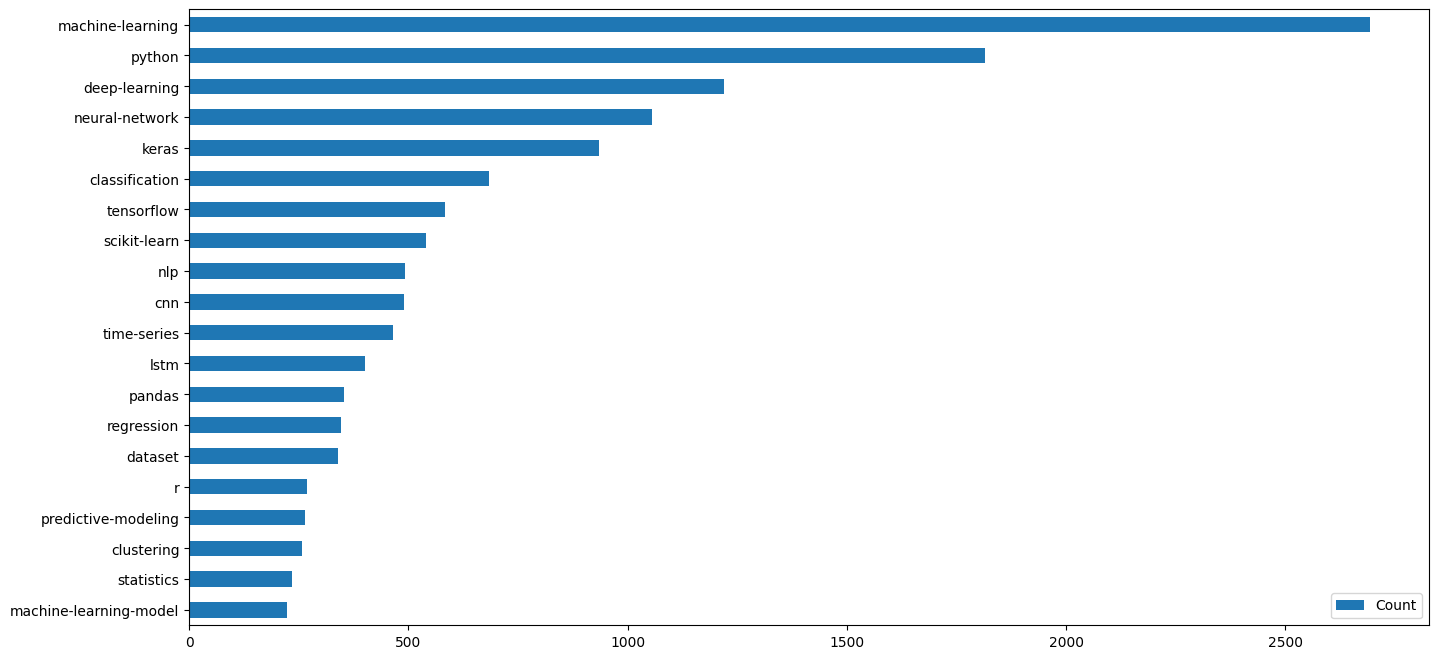

In [17]:
most_used.plot(kind="barh", figsize=(16,8))
plt.gca().invert_yaxis()
plt.show()

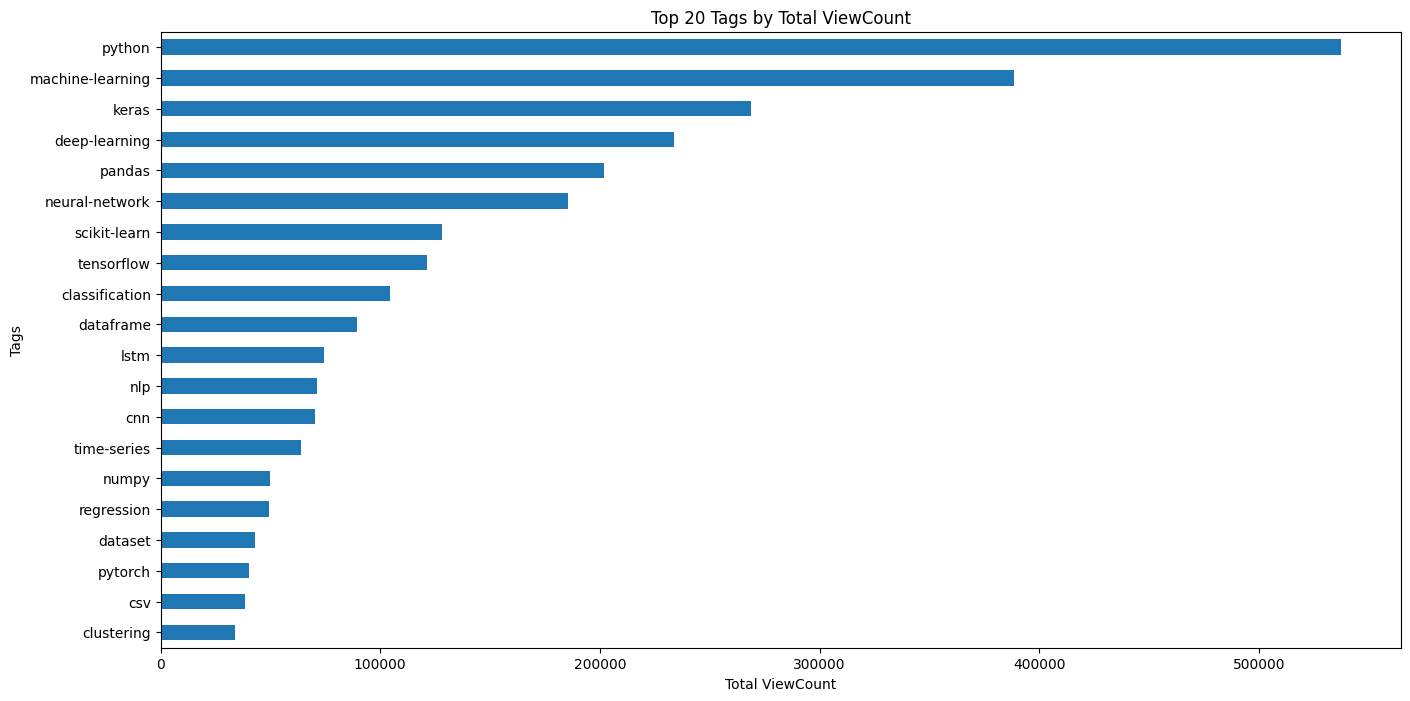

In [18]:
tag_view_count = {}

for tags, view_count in zip(questions['Tags'], questions['ViewCount']):
    for tag in tags:
        tag_view_count[tag] = tag_view_count.get(tag, 0) + view_count

tag_view_count_df = pd.DataFrame.from_dict(tag_view_count, orient="index", columns=["ViewCount"])

most_viewed = tag_view_count_df.sort_values(by="ViewCount", ascending=False).head(20)

most_viewed.sort_values(by="ViewCount", ascending=True).plot(kind="barh", figsize=(16,8), legend=False)

plt.title('Top 20 Tags by Total ViewCount')
plt.xlabel('Total ViewCount')
plt.ylabel('Tags')
plt.show()

In [19]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

In [20]:
print(in_used)

                        Count  ViewCount
machine-learning         2693   388499.0
python                   1814   537585.0
deep-learning            1220   233628.0
neural-network           1055   185367.0
keras                     935   268608.0
classification            685   104457.0
tensorflow                584   121369.0
scikit-learn              540   128110.0
nlp                       493    71382.0
cnn                       489    70349.0
time-series               466    64134.0
lstm                      402    74458.0
pandas                    354   201787.0
regression                347    49451.0
dataset                   340    43151.0
r                         268        NaN
predictive-modeling       265        NaN
clustering                257    33928.0
statistics                234        NaN
machine-learning-model    224        NaN


In [21]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,Count,ViewCount
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


## Exploring Tag Relationships through Co-occurrence  

To explore the relationships between tags, we can analyze their **co-occurrence** across posts. Co-occurrence refers to counting how often pairs of tags appear together within the same post. This helps us identify which tags are frequently used together and can uncover meaningful associations.

### Steps to Analyze Co-occurrence:  
1. **Extract Tags**: Split the `Tags` column into a list of individual tags for each post.  
2. **Generate Pairs**: For each post, create pairs of tags that appear together.  
3. **Count Occurrences**: Count how often each pair of tags appears together across all posts.  
4. **Visualize**: Use techniques like heatmaps or network graphs to visualize the most common tag pairings.  

This method provides insights into the common themes or topics discussed together, which can be useful for understanding trends or categorizing content.  

In [27]:
all_tags = list(tag_counts_df.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:20,0:20]

,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,pca,dataset,bigdata,data,speech-to-text,fuzzy-logic,anomaly-detection,online-learning,matrix-factorisation,correlation
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regularization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time-series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forecast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forecasting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
associations = associations.fillna(0)

In [31]:
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [32]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,5386,998,858,732,390,518,212,376,226,248,262,142,124,238,198,126,246,122,178,278
python,998,3628,320,274,560,196,334,470,142,124,210,122,488,118,106,48,70,90,70,74
deep-learning,858,320,2440,610,494,118,272,32,144,320,88,206,2,42,64,10,64,4,24,38
neural-network,732,274,610,2110,470,130,216,48,48,236,66,138,2,84,40,18,26,16,22,20
keras,390,560,494,470,1870,116,512,68,46,232,102,266,6,62,26,20,22,0,6,34
classification,518,196,118,130,116,1370,40,94,70,40,50,40,6,68,56,20,54,24,38,42
tensorflow,212,334,272,216,512,40,1168,30,22,114,18,86,6,18,18,2,12,0,0,18
scikit-learn,376,470,32,48,68,94,30,1080,24,0,24,4,74,74,18,2,24,48,12,36
nlp,226,142,144,48,46,70,22,24,986,14,0,38,6,4,22,8,2,18,6,8
cnn,248,124,320,236,232,40,114,0,14,978,16,48,2,12,22,4,12,0,2,8


In [35]:
import numpy as np

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.nan

<Axes: >

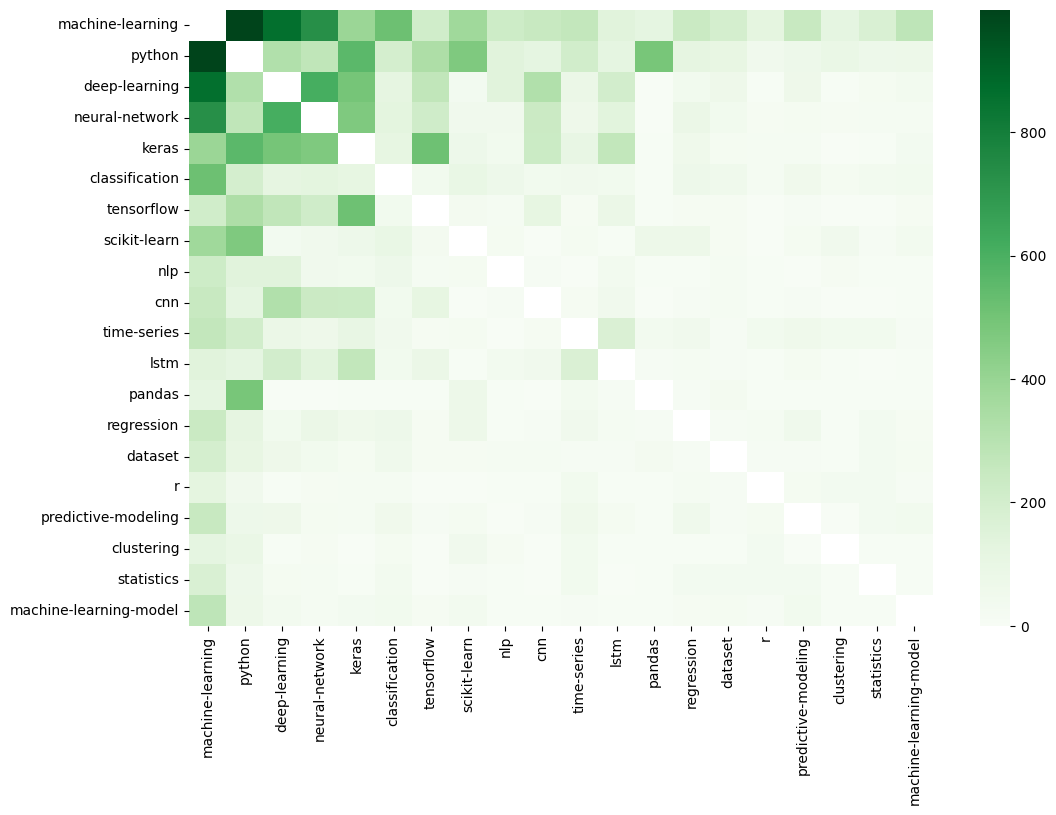

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

### Co-occurrence of Tags: Correlation vs Causation

In the analysis of tag co-occurrence, we observe that the most used tags also tend to have the strongest relationships, as shown by the dark concentration in the bottom right corner of the co-occurrence matrix. However, it's important to differentiate between correlation and causation:

- **Correlation**: The frequent co-occurrence of tags may simply be due to their high usage across many posts, rather than a meaningful relationship between the tags. For example, common tags like "Python" and "Data Science" might appear together often simply because both are popular in many posts, not because one necessarily causes the other.
  
- **Causation**: To establish causation, one would need more specific evidence that one tag directly influences the presence of another. This can be difficult to prove simply based on co-occurrence patterns.

### Key Points:
- **High Usage Leads to High Co-occurrence**: Popular tags are more likely to appear together, but this doesn’t imply that their co-occurrence is due to a direct causal link.
- **Spurious Relationships**: The frequent pairing of certain tags could be a coincidence driven by high usage, not a real connection.
- **Further Analysis Needed**: To explore potential causality, deeper analysis of the content of posts or advanced statistical methods would be required.

Thus, while we observe strong co-occurrence, it does not necessarily imply a causal relationship between the tags.

## Dataset Overview: all_questions.csv  

The file **all_questions.csv** contains the results of the following query, which retrieves all questions ever asked on the Data Science Stack Exchange (DSSE), including their creation dates and associated tags:

```sql
SELECT Id, CreationDate, Tags  
  FROM posts  
 WHERE PostTypeId = 1;


In [44]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [45]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")
all_questions["Tags"] = all_questions["Tags"].apply(lambda tags: [tag.strip("<>") for tag in tags])

all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


## Classifying Deep Learning Questions  

Based on expert knowledge and a review of relevant resources, we identified a set of tags closely related to deep learning. These tags are: `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.  

These tags were selected by analyzing the most frequently used tags and identifying those that are commonly associated with deep learning concepts.  

We'll use this list to classify questions as either related to deep learning (assigned a value of `1`) or not (assigned a value of `0`).  

In [51]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [52]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(class_deep_learning)

In [53]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

In [54]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [55]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
12,17Q2,226,647,0.349304
6,15Q4,66,382,0.172775
4,15Q2,28,284,0.098592
7,16Q1,110,516,0.213178
19,19Q1,804,1987,0.404630


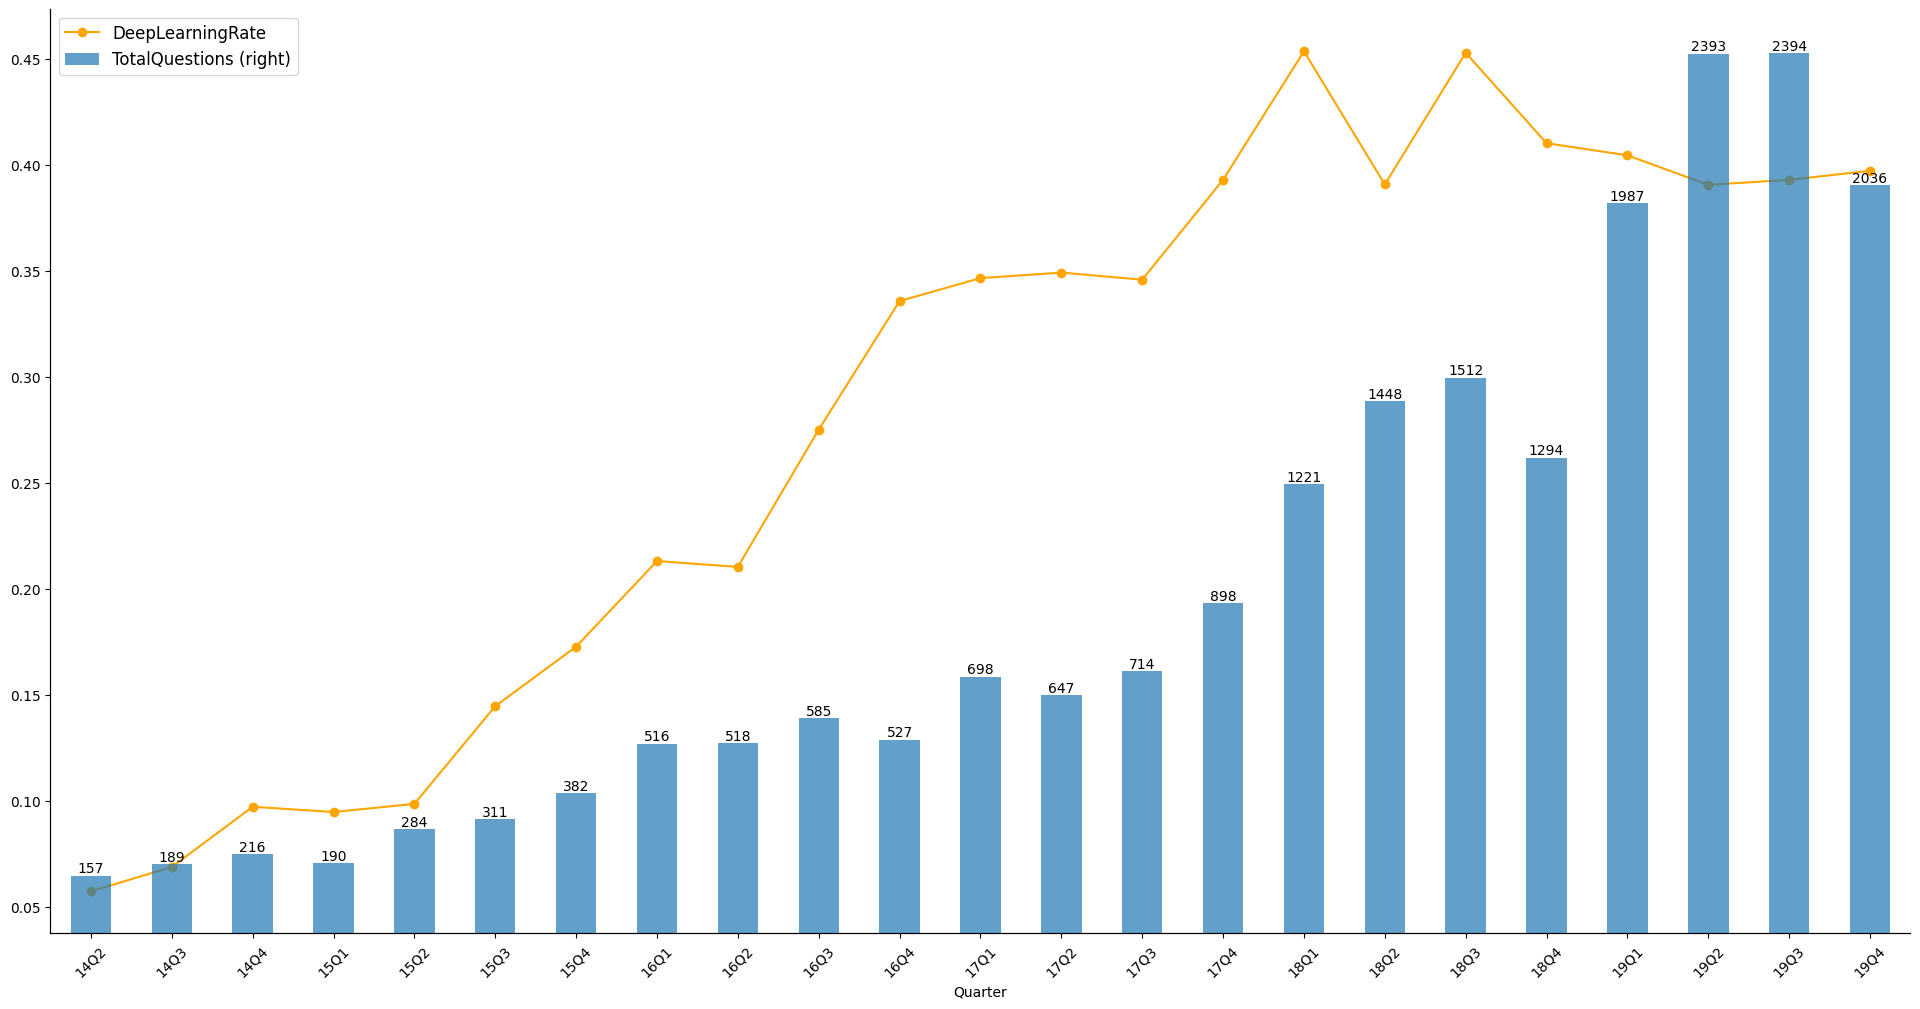

In [56]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)